# Projeto 1 - Ciência dos Dados

Nome: Diogo Nobre de Araujo Cintra

## Introdução

Foi escolhido o grupo dos BRICS para ser estudado neste projeto. 
Países membros: Brasil, Rússia, China e África do Sul.
O primeiro encontro dos presidentes de cada país ocorreu em 16 de junho de 2009 na Rússia, neste encontro a África do sul ainda não tinha entrado neste grupo político. Foi apenas em 24 de dezembro de 2010 que a África do Sul se tornou membro oficial do então conhecido país emergentes ou BRICS.

A criação dos BRICS foi pelo fato de seus países membros terem índices semelhantes como crescimento industrial, PIB per capta e infraestrutura. Essas características de índices semelhantes entre esses países definiram o que conhecemos como país emergente. Em teoria fazer parte dos BRICS gerou alguns benefícios, como a criação do Novo Banco de Desenvolvimento do BRICS, por intermédio do banco, busca-se mobilizar recursos para incrementar o aporte de investimentos em infraestrutura e desenvolvimento sustentável nos países do BRICS e criação do Arranjo Contingente de Reservas, esse arranjo visa a respaldar os países membros, especificamente em eventuais cenários de crise em seus balanços de pagamentos.

## Pergunta a ser respondida

Como a formação dos BRICS influenciou o crescimento dos países membros ?

## Explicação da hipótese e mecanismo

### Hipótese
A criação dos BRICS foi pela semelhança econômica e social entre seus países membros. Dessa forma com a união desses países os crescimentos econômicos seriam semelhantes durante e após a formação do grupo.

### Mecanismo
Caso ocorra o que foi proposto pela hipótese, o crescimento econômico dos países deve-se ao fato de acordos e benefícios gerados pelo o grupo como: a criação do Novo Banco de Desenvolvimento do BRICS, criação do Arranjo Contingente de Reservas e maior visibilidade para investimentos, uma vez que esses países estão emergindo na economia global, portanto são economicamente atraentes. Para verificar se isso ocorreu, será analisado como foram os crescimentos dos índices que caracterizam um país como emergente, antes e depois da formação do grupo.

http://engemausp.submissao.com.br/17/anais/arquivos/66.pdf
(Não sei colocar em ABNT)

## Bases de dados usadas

https://www.gapminder.org/data/

In [321]:
#Importando as bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np

#Leitura da base de dados
GDPCAPTA = pd.read_excel('gdpcapta.xlsx')
IDH = pd.read_excel('idh.xlsx')
INTERNET = pd.read_excel('usuariosinternet.xlsx')
INDUSTRIA = pd.read_excel('industria.xlsx')
INVESTIMENTO = pd.read_excel('investimento.xlsx')
CRESCIMENTOGDP = pd.read_excel('crescimentoGDP.xlsx')
GDP = pd.read_excel('gdp.xlsx')

In [328]:
gdpcapta = GDPCAPTA.set_index('country')
BRICSGDP1 = gdpcapta.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
BRICSGDP2 = BRICSGDP1.transpose()
BRICSGDP3 = BRICSGDP2.iloc[40:54]

idh = IDH.set_index('country')
BRICSIDH1 = idh.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
BRICSIDH2 = BRICSIDH1.transpose()
BRICSIDH3 = BRICSIDH2.iloc[10:24]

internet = INTERNET.set_index('country')
BRICSNET1 = internet.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
BRICSNET2 = BRICSNET1.transpose()
BRICSNET3 = BRICSNET2.iloc[10:24]

industria = INDUSTRIA.set_index('country')
BRICSIND1 = industria.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
BRICSIND2 = BRICSIND1.transpose()
BRICSIND3 = BRICSIND2.iloc[40:54]

investimento = INVESTIMENTO.set_index('country')
BRICSINVEST1 = investimento.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
BRICSINVEST2 = BRICSINVEST1.transpose()
BRICSINVEST3 = BRICSINVEST2.iloc[40:54]

crescimentogdp = CRESCIMENTOGDP.set_index('country')
CRESCIMENTOGDP1 = crescimentogdp.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
CRESCIMENTOGDP2 = CRESCIMENTOGDP1.transpose()
CRESCIMENTOGDP3 = CRESCIMENTOGDP2.iloc[199:]

gdp = GDP.set_index('country')
GDP1 = gdp.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
GDP2 = GDP1.transpose()
GDP3 = GDP2.iloc[40:54]
GDP3

country,Brazil,Russia,India,China,South Africa,Ecuador,Chile
2000,1.540000e+12,9.520000e+11,8.030000e+11,2.240000e+12,2.670000e+11,4.650000e+10,1.450000e+11
2001,1.560000e+12,1.000000e+12,8.410000e+11,2.420000e+12,2.740000e+11,4.830000e+10,1.490000e+11
2002,1.610000e+12,1.050000e+12,8.730000e+11,2.640000e+12,2.840000e+11,5.030000e+10,1.540000e+11
2003,1.630000e+12,1.120000e+12,9.420000e+11,2.910000e+12,2.930000e+11,5.170000e+10,1.600000e+11
2004,1.720000e+12,1.200000e+12,1.020000e+12,3.200000e+12,3.060000e+11,5.590000e+10,1.720000e+11
2005,1.770000e+12,1.280000e+12,1.110000e+12,3.570000e+12,3.220000e+11,5.890000e+10,1.820000e+11
2006,1.850000e+12,1.390000e+12,1.210000e+12,4.020000e+12,3.400000e+11,6.150000e+10,1.930000e+11
2007,1.960000e+12,1.500000e+12,1.330000e+12,4.600000e+12,3.580000e+11,6.280000e+10,2.030000e+11
2008,2.060000e+12,1.580000e+12,1.390000e+12,5.040000e+12,3.700000e+11,6.680000e+10,2.100000e+11
2009,2.050000e+12,1.460000e+12,1.500000e+12,5.510000e+12,3.640000e+11,6.720000e+10,2.060000e+11


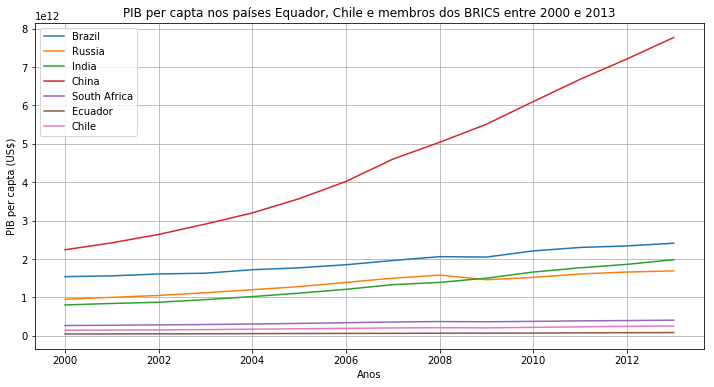

In [329]:
GDP3.plot(subplots=False, figsize=(12, 6));
plt.legend(loc='upper left')
plt.xlabel("Anos")
plt.ylabel("PIB per capta (US$)")
plt.title("PIB per capta nos países Equador, Chile e membros dos BRICS entre 2000 e 2013")
plt.grid(True)

### Corrigir legenda
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

### Definindo um parâmetro/faixa para definir índices economicos e sociais de um BRICS

In [343]:
BRICSGDP5 = BRICSGDP4[BRICSGDP4.index == 2010]
BRICSGDP6 = BRICSGDP5.transpose()
BRICSIDH5 = BRICSIDH4[BRICSIDH4.index == 2010]
BRICSIDH6 = BRICSIDH5.transpose()
BRICSNET5 = BRICSNET4[BRICSNET4.index == 2010]
BRICSNET6 = BRICSNET5.transpose()
BRICSIND5 = BRICSIND4[BRICSIND4.index == 2010]
BRICSIND6 = BRICSIND5.transpose()
BRICSINVEST5 = BRICSINVEST4[BRICSINVEST4.index == 2010]
BRICSINVEST6 = BRICSINVEST5.transpose()
BRICSCRESCIMENTOGDP5 = CRESCIMENTOGDP4[CRESCIMENTOGDP4.index == 2010]
BRICSCRESCIMENTOGDP6 = BRICSCRESCIMENTOGDP5.transpose()

GDP5 = GDP3[GDP3.index == 2010]
GDP6 = GDP5.transpose()

BRICS2010_1 = BRICSGDP6.join(BRICSIDH6, how='outer', lsuffix='_GDPCAPTA', rsuffix='_IDH')
BRICS2010_2 = BRICS2010_1.join(BRICSNET6, how='outer')
BRICS2010_2.rename(columns={2010:'2010_NET'}, inplace=True)
BRICS2010_3 = BRICS2010_2.join(BRICSIND6, how='outer')
BRICS2010_3.rename(columns={2010:'2010_IND'}, inplace=True)
BRICS2010_4 = BRICS2010_3.join(BRICSINVEST6, how='outer')
BRICS2010_4.rename(columns={2010:'2010_INVEST'}, inplace=True) 
BRICS2010_5 = BRICS2010_4.join(BRICSCRESCIMENTOGDP6, how='outer')
BRICS2010_5.rename(columns={2010:'2010_CRESCGDP'}, inplace=True)
BRICS2010_6 = BRICS2010_5.join(GDP6, how='outer')
BRICS2010_6.rename(columns={2010:'2010_GDP'}, inplace=True)
BRICS2010_6

,2010_GDPCAPTA,2010_IDH,2010_NET,2010_IND,2010_INVEST,2010_CRESCGDP,2010_GDP
country,,,,,,,
Brazil,11200.0,0.724,40.6,23.3,21.8,7.53,2.210000e+12
Russia,10700.0,0.785,43.0,30.0,22.6,4.28,1.520000e+12
India,1350.0,0.580,7.5,30.1,40.7,11.20,1.660000e+12
China,4560.0,0.700,34.3,46.4,47.6,7.34,6.100000e+12
South Africa,7280.0,0.638,24.0,27.4,19.5,3.56,3.750000e+11
Ecuador,4660.0,0.710,29.0,34.7,28.0,3.19,6.960000e+10
Chile,12900.0,0.820,45.0,35.7,23.1,5.73,2.190000e+11


### Verificando se os países que pertencem ao BRICS ainda podem ser considerados como emergente
#### Os países Chile e Equador estão presentes abaixo apenas como fator de comparação.

In [350]:
BRICSGDP5 = BRICSGDP4[BRICSGDP4.index == 2013]
BRICSGDP6 = BRICSGDP5.transpose()
BRICSIDH5 = BRICSIDH4[BRICSIDH4.index == 2013]
BRICSIDH6 = BRICSIDH5.transpose()
BRICSNET5 = BRICSNET4[BRICSNET4.index == 2013]
BRICSNET6 = BRICSNET5.transpose()
BRICSIND5 = BRICSIND4[BRICSIND4.index == 2013]
BRICSIND6 = BRICSIND5.transpose()
BRICSINVEST5 = BRICSINVEST4[BRICSINVEST4.index == 2013]
BRICSINVEST6 = BRICSINVEST5.transpose()
BRICSCRESCIMENTOGDP5 = CRESCIMENTOGDP4[CRESCIMENTOGDP4.index == 2013]
BRICSCRESCIMENTOGDP6 = BRICSCRESCIMENTOGDP5.transpose()

GDP7 = GDP3[GDP3.index == 2013]
GDP8 = GDP7.transpose()

BRICS2013_1 = BRICSGDP6.join(BRICSIDH6, how='outer', lsuffix='_GDPCAPTA', rsuffix='_IDH')
BRICS2013_2 = BRICS2013_1.join(BRICSNET6, how='outer')
BRICS2013_2.rename(columns={2013:'2013_NET'}, inplace=True)
BRICS2013_3 = BRICS2013_2.join(BRICSIND6, how='outer')
BRICS2013_3.rename(columns={2013:'2013_IND'}, inplace=True)
BRICS2013_4 = BRICS2013_3.join(BRICSINVEST6, how='outer')
BRICS2013_4.rename(columns={2013:'2013_INVEST'}, inplace=True) 
BRICS2013_5 = BRICS2013_4.join(BRICSCRESCIMENTOGDP6, how='outer')
BRICS2013_5.rename(columns={2013:'2013_CRESCGDP'}, inplace=True)
BRICS2013_6 = BRICS2013_5.join(GDP8, how='outer')
BRICS2013_6.rename(columns={2013:'2013_GDP'}, inplace=True)


BRICS2013 = BRICS2013_6[(BRICS2013_6['2013_GDPCAPTA']>=1350) & (BRICS2013_6['2013_IDH'] >= 0.58) & (BRICS2013_6['2013_NET'] >= 7.5) & (BRICS2013_6['2013_IND'] >= 23.3) & (BRICS2013_6['2013_INVEST'] >= 19.5) & (BRICS2013_6['2013_CRESCGDP'] >= 3.56) & (BRICS2013_6['2013_GDP'] >= 3.750000e+11)]
BRICS2013_6

,2013_GDPCAPTA,2013_IDH,2013_NET,2013_IND,2013_INVEST,2013_CRESCGDP,2013_GDP
country,,,,,,,
Brazil,11900.0,0.747,51.0,21.2,21.7,2.24,2.410000e+12
Russia,11800.0,0.803,68.0,28.2,23.1,1.23,1.690000e+12
India,1550.0,0.607,15.1,28.4,34.0,4.37,1.980000e+12
China,5720.0,0.723,45.8,44.0,47.4,7.60,7.770000e+12
South Africa,7550.0,0.660,46.5,26.7,21.2,1.01,4.060000e+11
Ecuador,5310.0,0.737,40.3,37.1,28.5,3.92,8.320000e+10
Chile,14600.0,0.841,58.0,31.2,25.6,4.21,2.540000e+11


In [368]:
BRICS_2010_2013_6 = BRICS2010_6.join(BRICS2013_6)

In [381]:
#for var in ['GDPCAPTA', 'IDH', 'NET', 'IND', 'INVEST', 'GDP']:
#    BRICS_2010_2013_6[[f'2010_{var}', f'2013_{var}']].plot.bar()

,2010_GDPCAPTA,2013_GDPCAPTA
country,,
Brazil,11200.0,11900.0
Russia,10700.0,11800.0
India,1350.0,1550.0
China,4560.0,5720.0
South Africa,7280.0,7550.0
Ecuador,4660.0,5310.0
Chile,12900.0,14600.0


Text(0.5, 1.0, 'Comparação do PIB per capta dos países Equador, Chile e membros dos BRICS em 2010 e 2013')

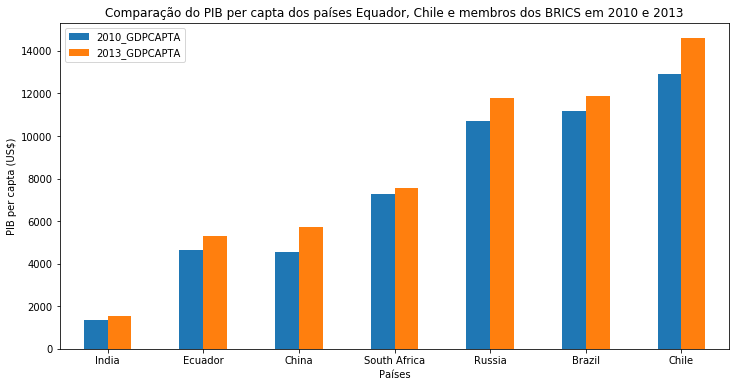

In [383]:
gdpCAPTA = BRICS_2010_2013_6[['2010_GDPCAPTA', '2013_GDPCAPTA']].sort_values(by='2013_GDPCAPTA')
gdpCAPTA.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("PIB per capta (US$)")
plt.title("Comparação do PIB per capta dos países Equador, Chile e membros dos BRICS em 2010 e 2013")

In [389]:
gdpCAPTA

,2010_GDPCAPTA,2013_GDPCAPTA
country,,
India,1350.0,1550.0
Ecuador,4660.0,5310.0
China,4560.0,5720.0
South Africa,7280.0,7550.0
Russia,10700.0,11800.0
Brazil,11200.0,11900.0
Chile,12900.0,14600.0


In [412]:
crescgdpCAPTA1 = (gdpCAPTA['2013_GDPCAPTA']*100)/gdpCAPTA['2010_GDPCAPTA']-100
crescgdpCAPTA2 = crescgdpCAPTA1.to_frame()
crescgdpCAPTA2.rename(columns={0:'GDPCAPTA'}, inplace=True)
crescgdpCAPTA2

,GDPCAPTA
country,
India,14.814815
Ecuador,13.948498
China,25.438596
South Africa,3.708791
Russia,10.280374
Brazil,6.250000
Chile,13.178295


Text(0.5, 1.0, 'Comparação do crescimento em % do PIB per capta dos países Equador, Chile e membros dos BRICS de 2010 para 2013')

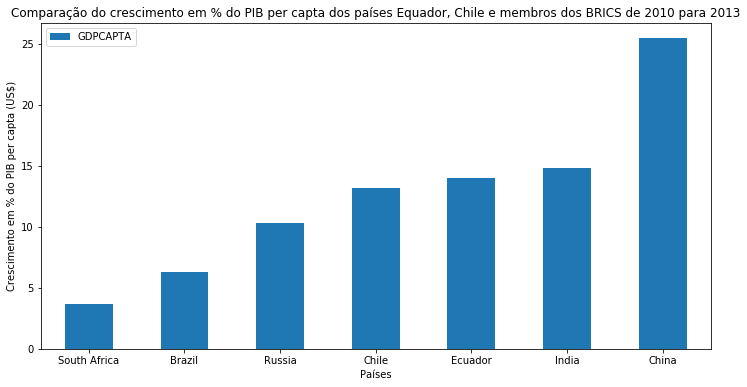

In [413]:
crescgdpCAPTA3 = crescgdpCAPTA2.sort_values(by='GDPCAPTA')
crescgdpCAPTA3.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento em % do PIB per capta (US$)")
plt.title("Comparação do crescimento em % do PIB per capta dos países Equador, Chile e membros dos BRICS de 2010 para 2013")

Text(0.5, 1.0, 'Comparação do IDH dos países Equador, Chile e membros dos BRICS em 2010 e 2013')

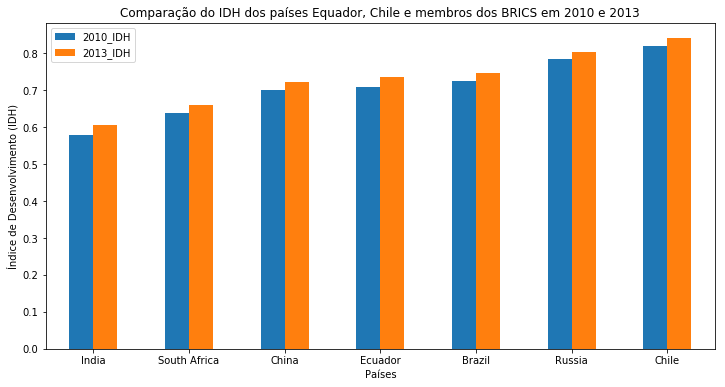

In [407]:
idh1 = BRICS_2010_2013_6[['2010_IDH', '2013_IDH']].sort_values(by='2013_IDH')
idh1.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Índice de Desenvolvimento (IDH)")
plt.title("Comparação do IDH dos países Equador, Chile e membros dos BRICS em 2010 e 2013")

In [411]:
crescidh1 = (idh1['2013_IDH']*100)/idh1['2010_IDH']-100
crescidh2 = crescidh1.to_frame()
crescidh2.rename(columns={0:'IDH'}, inplace=True)
crescidh2

,IDH
country,
India,4.655172
South Africa,3.448276
China,3.285714
Ecuador,3.802817
Brazil,3.176796
Russia,2.292994
Chile,2.560976


Text(0.5, 1.0, 'Comparação do crescimento em % do PIB per capta dos países Equador, Chile e membros dos BRICS de 2010 para 2013')

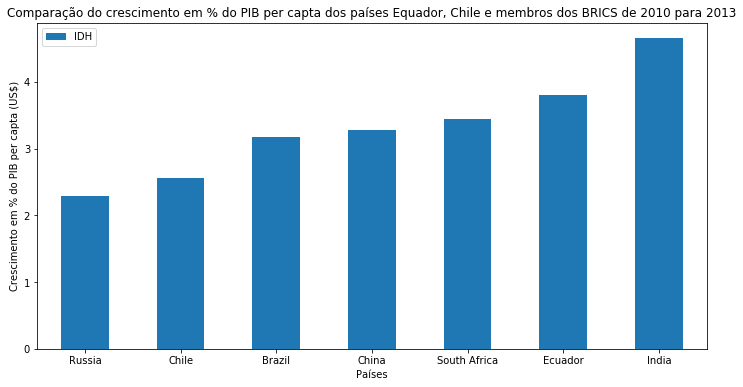

In [414]:
crescidh3 = crescidh2.sort_values(by='IDH')
crescidh3.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento em % do PIB per capta (US$)")
plt.title("Comparação do crescimento em % do PIB per capta dos países Equador, Chile e membros dos BRICS de 2010 para 2013")

In [385]:
GDP1 = gdp[2010]
GDP1.sum()

65025964000000

In [338]:
GDP2 = gdp[2013]
GDP2.sum()

70514487700000.0

In [348]:
PORCGDP_1 = 100*(BRICS2010_6['2010_GDP']/GDP1.sum())
PORCGDP_2 = 100*(BRICS2013_6['2013_GDP']/GDP2.sum())

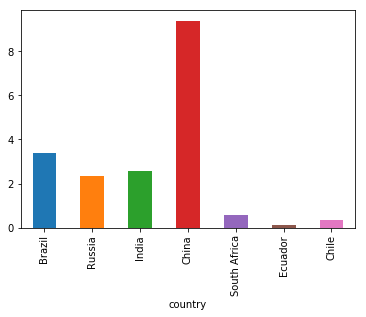

In [349]:
PORCGDP_1.plot(kind='bar')

## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados